In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv(r"C:\Users\RGUKT\Desktop\Python\DataScience\Projects\Breat Cancer Prediction\data\data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [34]:
# we dont have the use of id and Unnamed: 32 columns so we can drop them
df = df.drop(["id","Unnamed: 32"],axis=1)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [37]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [24]:
df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean']].corr()["diagnosis"].sort_values(ascending=False)

diagnosis              1.000000
concave points_mean    0.776614
perimeter_mean         0.742636
radius_mean            0.730029
area_mean              0.708984
concavity_mean         0.696360
compactness_mean       0.596534
texture_mean           0.415185
smoothness_mean        0.358560
Name: diagnosis, dtype: float64

In [21]:
df[["diagnosis","smoothness_mean","fractal_dimension_se","symmetry_se","concavity_se","compactness_se","smoothness_se","texture_se","symmetry_mean","fractal_dimension_worst"]].corr()

,diagnosis,smoothness_mean,fractal_dimension_se,symmetry_se,concavity_se,compactness_se,smoothness_se,texture_se,symmetry_mean,fractal_dimension_worst
diagnosis,1.000000,0.358560,0.077972,-0.006522,0.253730,0.292999,-0.067016,-0.008303,0.330499,0.323872
smoothness_mean,0.358560,1.000000,0.283607,0.200774,0.248396,0.318943,0.332375,0.068406,0.557775,0.499316
fractal_dimension_se,0.077972,0.283607,1.000000,0.369078,0.727372,0.803269,0.427374,0.279723,0.331786,0.591328
symmetry_se,-0.006522,0.200774,0.369078,1.000000,0.309429,0.394713,0.413506,0.411621,0.449137,0.078079
concavity_se,0.253730,0.248396,0.727372,0.309429,1.000000,0.801268,0.268685,0.194998,0.342627,0.439329
compactness_se,0.292999,0.318943,0.803269,0.394713,0.801268,1.000000,0.336696,0.231700,0.421659,0.590973
smoothness_se,-0.067016,0.332375,0.427374,0.413506,0.268685,0.336696,1.000000,0.397243,0.187321,0.101480
texture_se,-0.008303,0.068406,0.279723,0.411621,0.194998,0.231700,0.397243,1.000000,0.128053,-0.045655
symmetry_mean,0.330499,0.557775,0.331786,0.449137,0.342627,0.421659,0.187321,0.128053,1.000000,0.438413
fractal_dimension_worst,0.323872,0.499316,0.591328,0.078079,0.439329,0.590973,0.101480,-0.045655,0.438413,1.000000


In [38]:
df = df.drop(["smoothness_mean","fractal_dimension_se","symmetry_se","concavity_se","compactness_se","smoothness_se","texture_se","symmetry_mean","fractal_dimension_worst"],axis=1)

In [39]:
df.corr()["diagnosis"].sort_values(ascending=False)

diagnosis                 1.000000
concave points_worst      0.793566
perimeter_worst           0.782914
concave points_mean       0.776614
radius_worst              0.776454
perimeter_mean            0.742636
area_worst                0.733825
radius_mean               0.730029
area_mean                 0.708984
concavity_mean            0.696360
concavity_worst           0.659610
compactness_mean          0.596534
compactness_worst         0.590998
radius_se                 0.567134
perimeter_se              0.556141
area_se                   0.548236
texture_worst             0.456903
smoothness_worst          0.421465
symmetry_worst            0.416294
texture_mean              0.415185
concave points_se         0.408042
fractal_dimension_mean   -0.012838
Name: diagnosis, dtype: float64

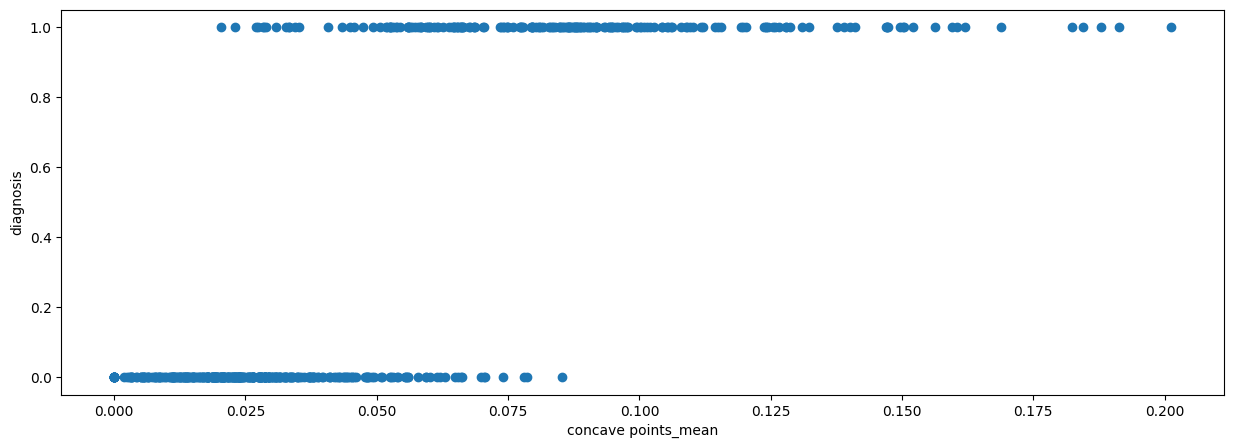

In [46]:
plt.figure(figsize=(15,5))
plt.scatter(x=df["concave points_mean"],y=df["diagnosis"])
plt.xlabel("concave points_mean")
plt.ylabel("diagnosis") 
plt.show()

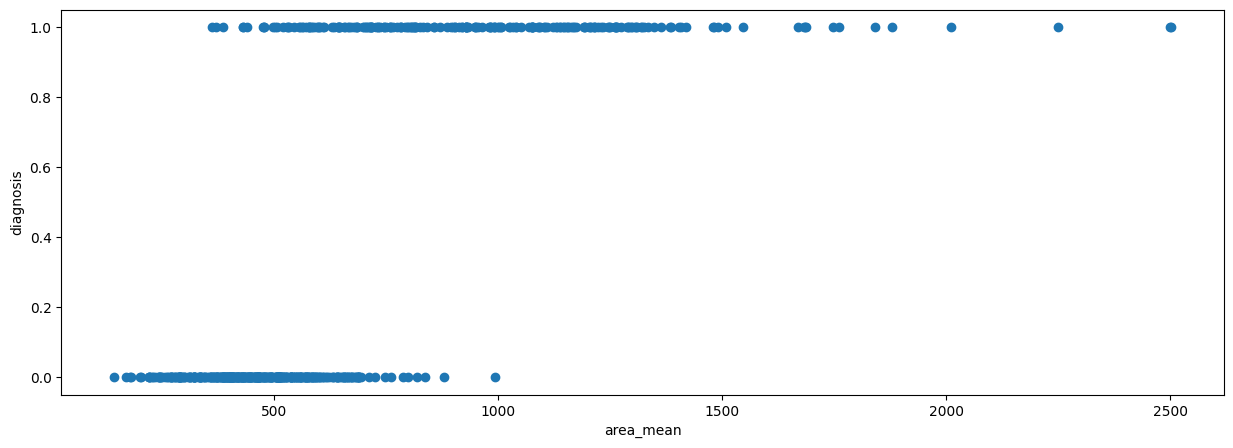

In [47]:
plt.figure(figsize=(15,5))
plt.scatter(x=df["area_mean"],y=df["diagnosis"])
plt.xlabel("area_mean")
plt.ylabel("diagnosis")
plt.show()